# 10.2 조건부엔트로피

In [12]:
(0.39 * (30/39 * np.log2(30/39) +  9/39 * np.log2(9/39))) + (0.61 * (20/61 * np.log2(20/61) + 41/61 * np.log2(41/61)))

-0.8607142715863871

In [18]:
(0.7 * (42/70 * np.log2(42/70) + 28/70 * np.log2(28/70))) + (0.3 * (8/30 * np.log2(8/30) + 22/30 * np.log2(22/30)))

-0.930657638700618

### 연습문제 10.2.1

1.

In [45]:
def cond_entropy(v):
    eps = np.finfo('float').eps
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base = 2)
    HYX1 = sp.stats.entropy(pYX1, base = 2)
    HYX = np.sum(v, axis = 1) @ [HYX0 , HYX1] / np.sum(v)
    return HYX

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


In [22]:
df['X1'] = df['sepal length (cm)'] > 6
pivot_table1 = df.groupby(['X1', 'species']).size().unstack().fillna(0)

In [24]:
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [28]:
v = pivot_table1.values
eps = np.finfo('float').eps
pYX0 = v[0, :] / np.sum(v[0, :])
pYX1 = v[1, :] / np.sum(v[0, :])
HYX0 = sp.stats.entropy(pYX0, base = 2)
HYX1 = sp.stats.entropy(pYX1, base = 2)
HYX = np.sum(v, axis = 1) @ [HYX0 , HYX1] / np.sum(v)

In [30]:
np.sum(v, axis = 1)

array([39, 61], dtype=int64)

In [34]:
[HYX0 , HYX1]

[0.7793498372920851, 0.9127341558073342]

In [35]:
0.39 * HYX0 + 0.61 * HYX1

0.860714271586387

In [27]:
cond_entropy(pivot_table1.values)

NameError: name 'pviot_table1' is not defined

In [38]:
min(df['sepal length (cm)'])

4.9

In [39]:
max(df['sepal length (cm)'])

7.9

In [41]:
val_list = []
val = 4.9
while val <= 7.9:
    val_list.append(val)
    val += 0.05

In [44]:
val_list

[4.9,
 4.95,
 5.0,
 5.05,
 5.1,
 5.1499999999999995,
 5.199999999999999,
 5.249999999999999,
 5.299999999999999,
 5.349999999999999,
 5.399999999999999,
 5.449999999999998,
 5.499999999999998,
 5.549999999999998,
 5.599999999999998,
 5.649999999999998,
 5.6999999999999975,
 5.749999999999997,
 5.799999999999997,
 5.849999999999997,
 5.899999999999997,
 5.949999999999997,
 5.9999999999999964,
 6.049999999999996,
 6.099999999999996,
 6.149999999999996,
 6.199999999999996,
 6.249999999999996,
 6.299999999999995,
 6.349999999999995,
 6.399999999999995,
 6.449999999999995,
 6.499999999999995,
 6.5499999999999945,
 6.599999999999994,
 6.649999999999994,
 6.699999999999994,
 6.749999999999994,
 6.799999999999994,
 6.849999999999993,
 6.899999999999993,
 6.949999999999993,
 6.999999999999993,
 7.049999999999993,
 7.0999999999999925,
 7.149999999999992,
 7.199999999999992,
 7.249999999999992,
 7.299999999999992,
 7.349999999999992,
 7.3999999999999915,
 7.449999999999991,
 7.499999999999991,
 7

In [46]:
for i in val_list:
    df['X'] = df['sepal length (cm)'] > i
    pivot_table = df.groupby(['X', 'species']).size().unstack().fillna(0)    
    print(cond_entropy(pivot_table.values))

1.0
1.0
0.9921505417657337
0.9921505417657337
0.9854129092560906
0.9854129092560906
0.9854129092560906
0.9777731489110747
0.9777731489110747
0.9777731489110747
0.9777731489110747
0.9694770530143693
0.9694770530143693
0.9214431574645288
0.9214431574645288
0.8932597776751744
0.8932597776751744
0.8594091277095427
0.8594091277095427
0.8828123014105905
0.8828123014105905
0.8766158010393013
0.8766158010393013
0.860714271586387
0.860714271586387
0.8395000263554215
0.8395000263554215
0.8413871497735644
0.8413871497735644
0.877650867560479
0.877650867560479
0.90539323548625
0.90539323548625
0.9306576387006182
0.9306576387006182
0.9040233826945792
0.9040233826945792
0.9042037171763908
0.9042037171763908
0.9040867654123343
0.9040867654123343
0.9108022259351823
0.9108022259351823
0.8681592744048966
0.8681592744048966
0.8801677933164548
0.8801677933164548
0.9149755871180102
0.9149755871180102
0.9261957549212048
0.9261957549212048
0.9372355134892061
0.9372355134892061
0.9372355134892061
0.9372355134

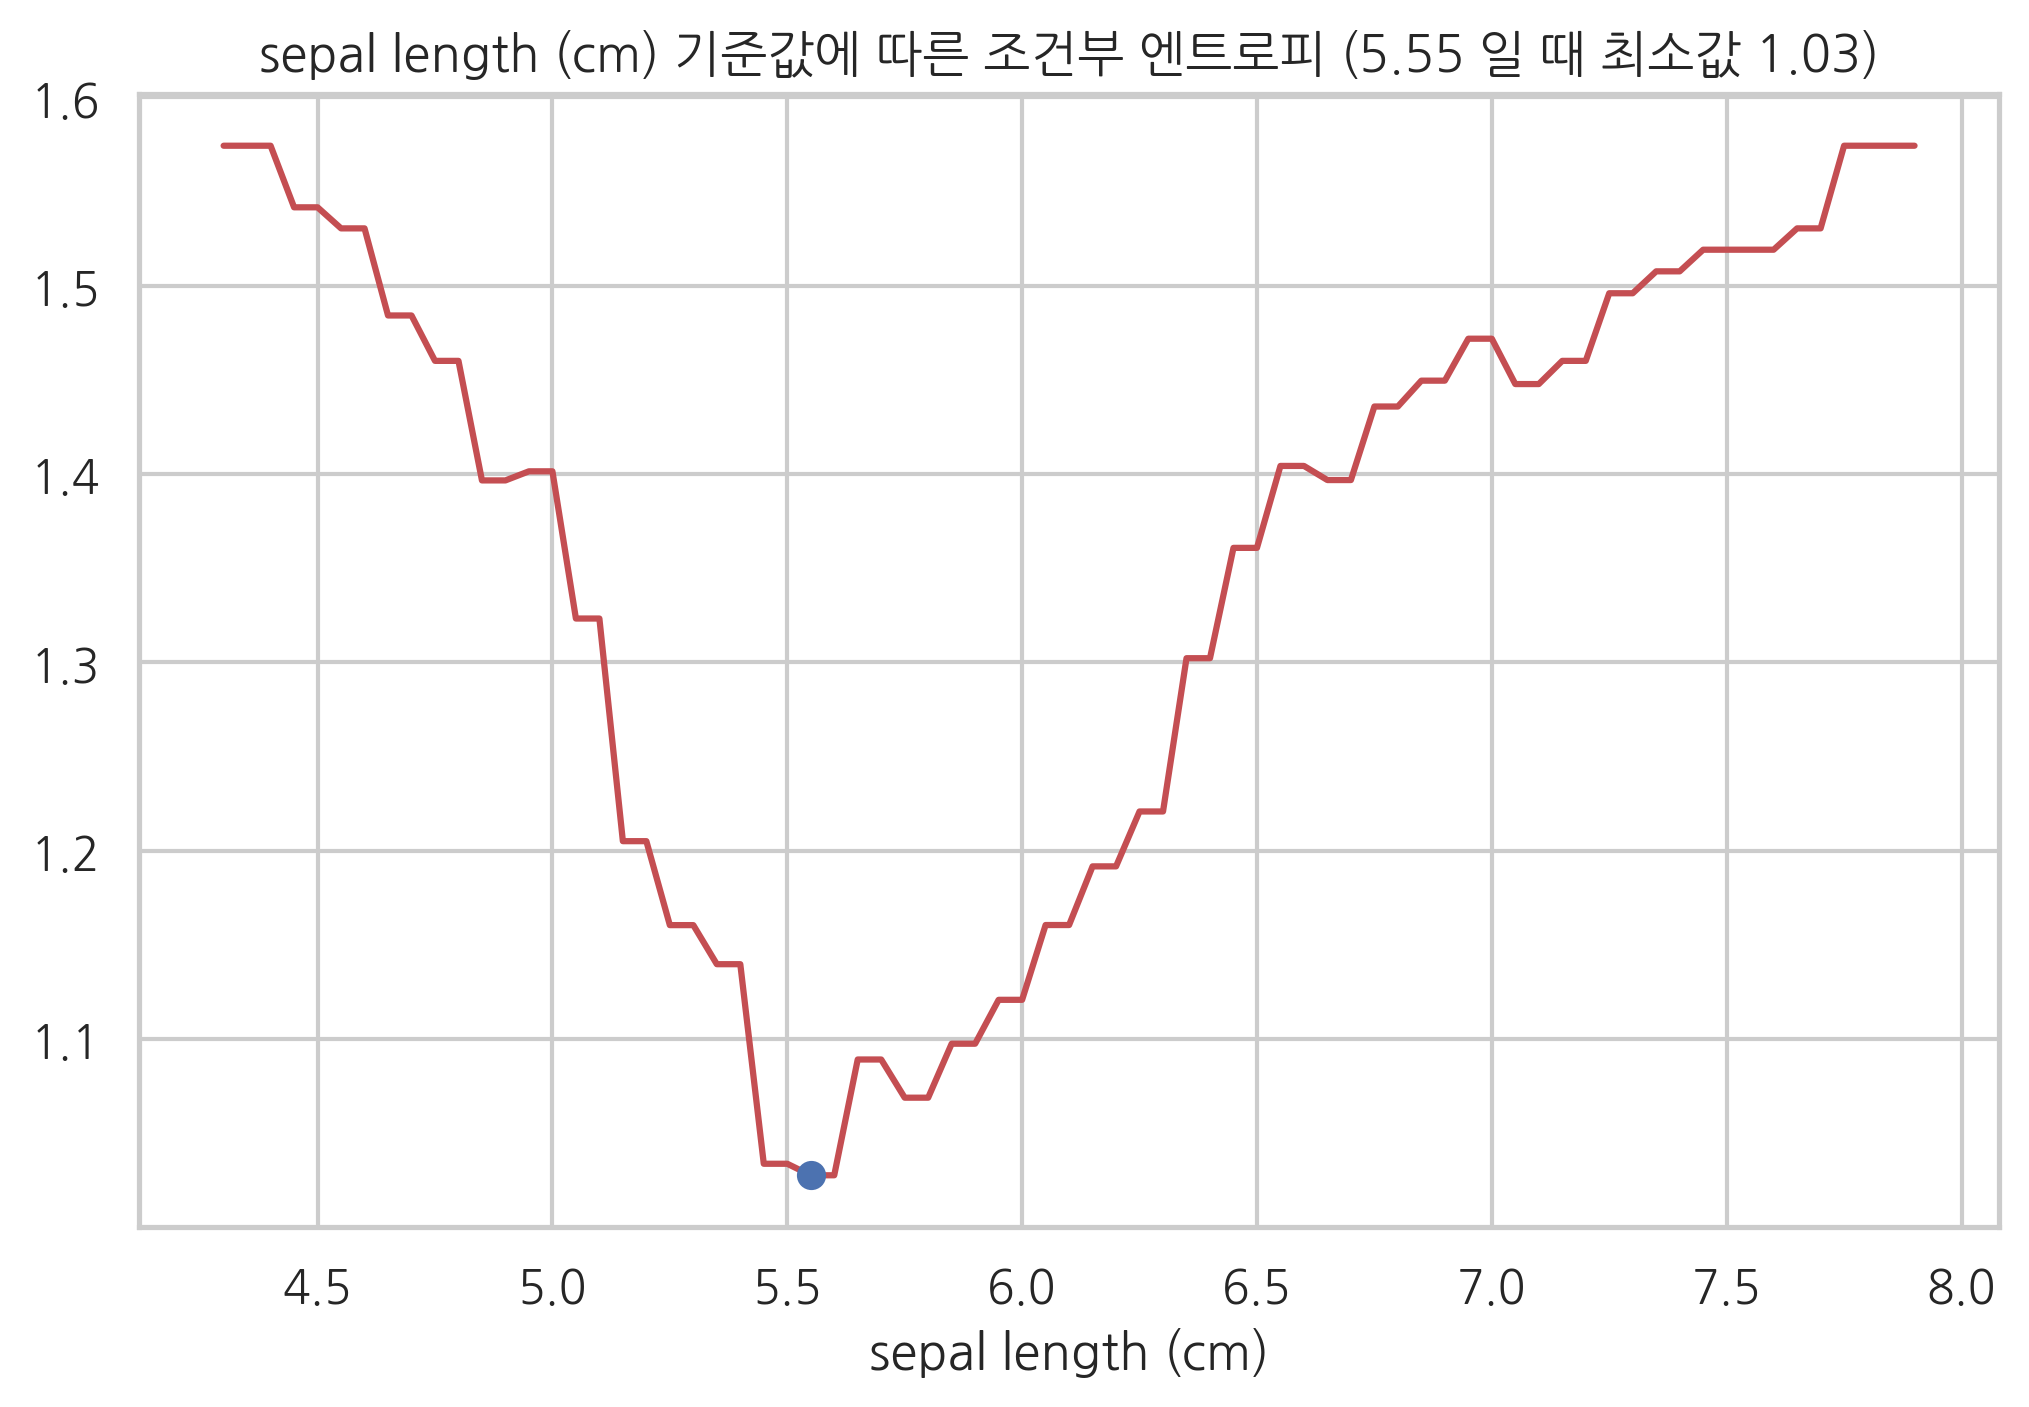

In [51]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target


def calc_cond_entropies(col, threshold):
    df['X1'] = df[col] > threshold
    pivot_table1 = df.groupby(['X1', 'species']).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base = 2)
    HYX1 = sp.stats.entropy(pYX1, base = 2)
    HYX = np.sum(v, axis = 1) @ [HYX0 , HYX1] / np.sum(v)
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    cond_entropies = []
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    plt.plot(th_range, cond_entropies, 'r-')
    plt.plot(th_min, ce_min, 'bo')
    title = '{} 기준값에 따른 조건부 엔트로피 ({:.3} 일 때 최소값 {:.3})'.format(col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()
plot_min_cond_entropy('sepal length (cm)')

2.

5.55

3.

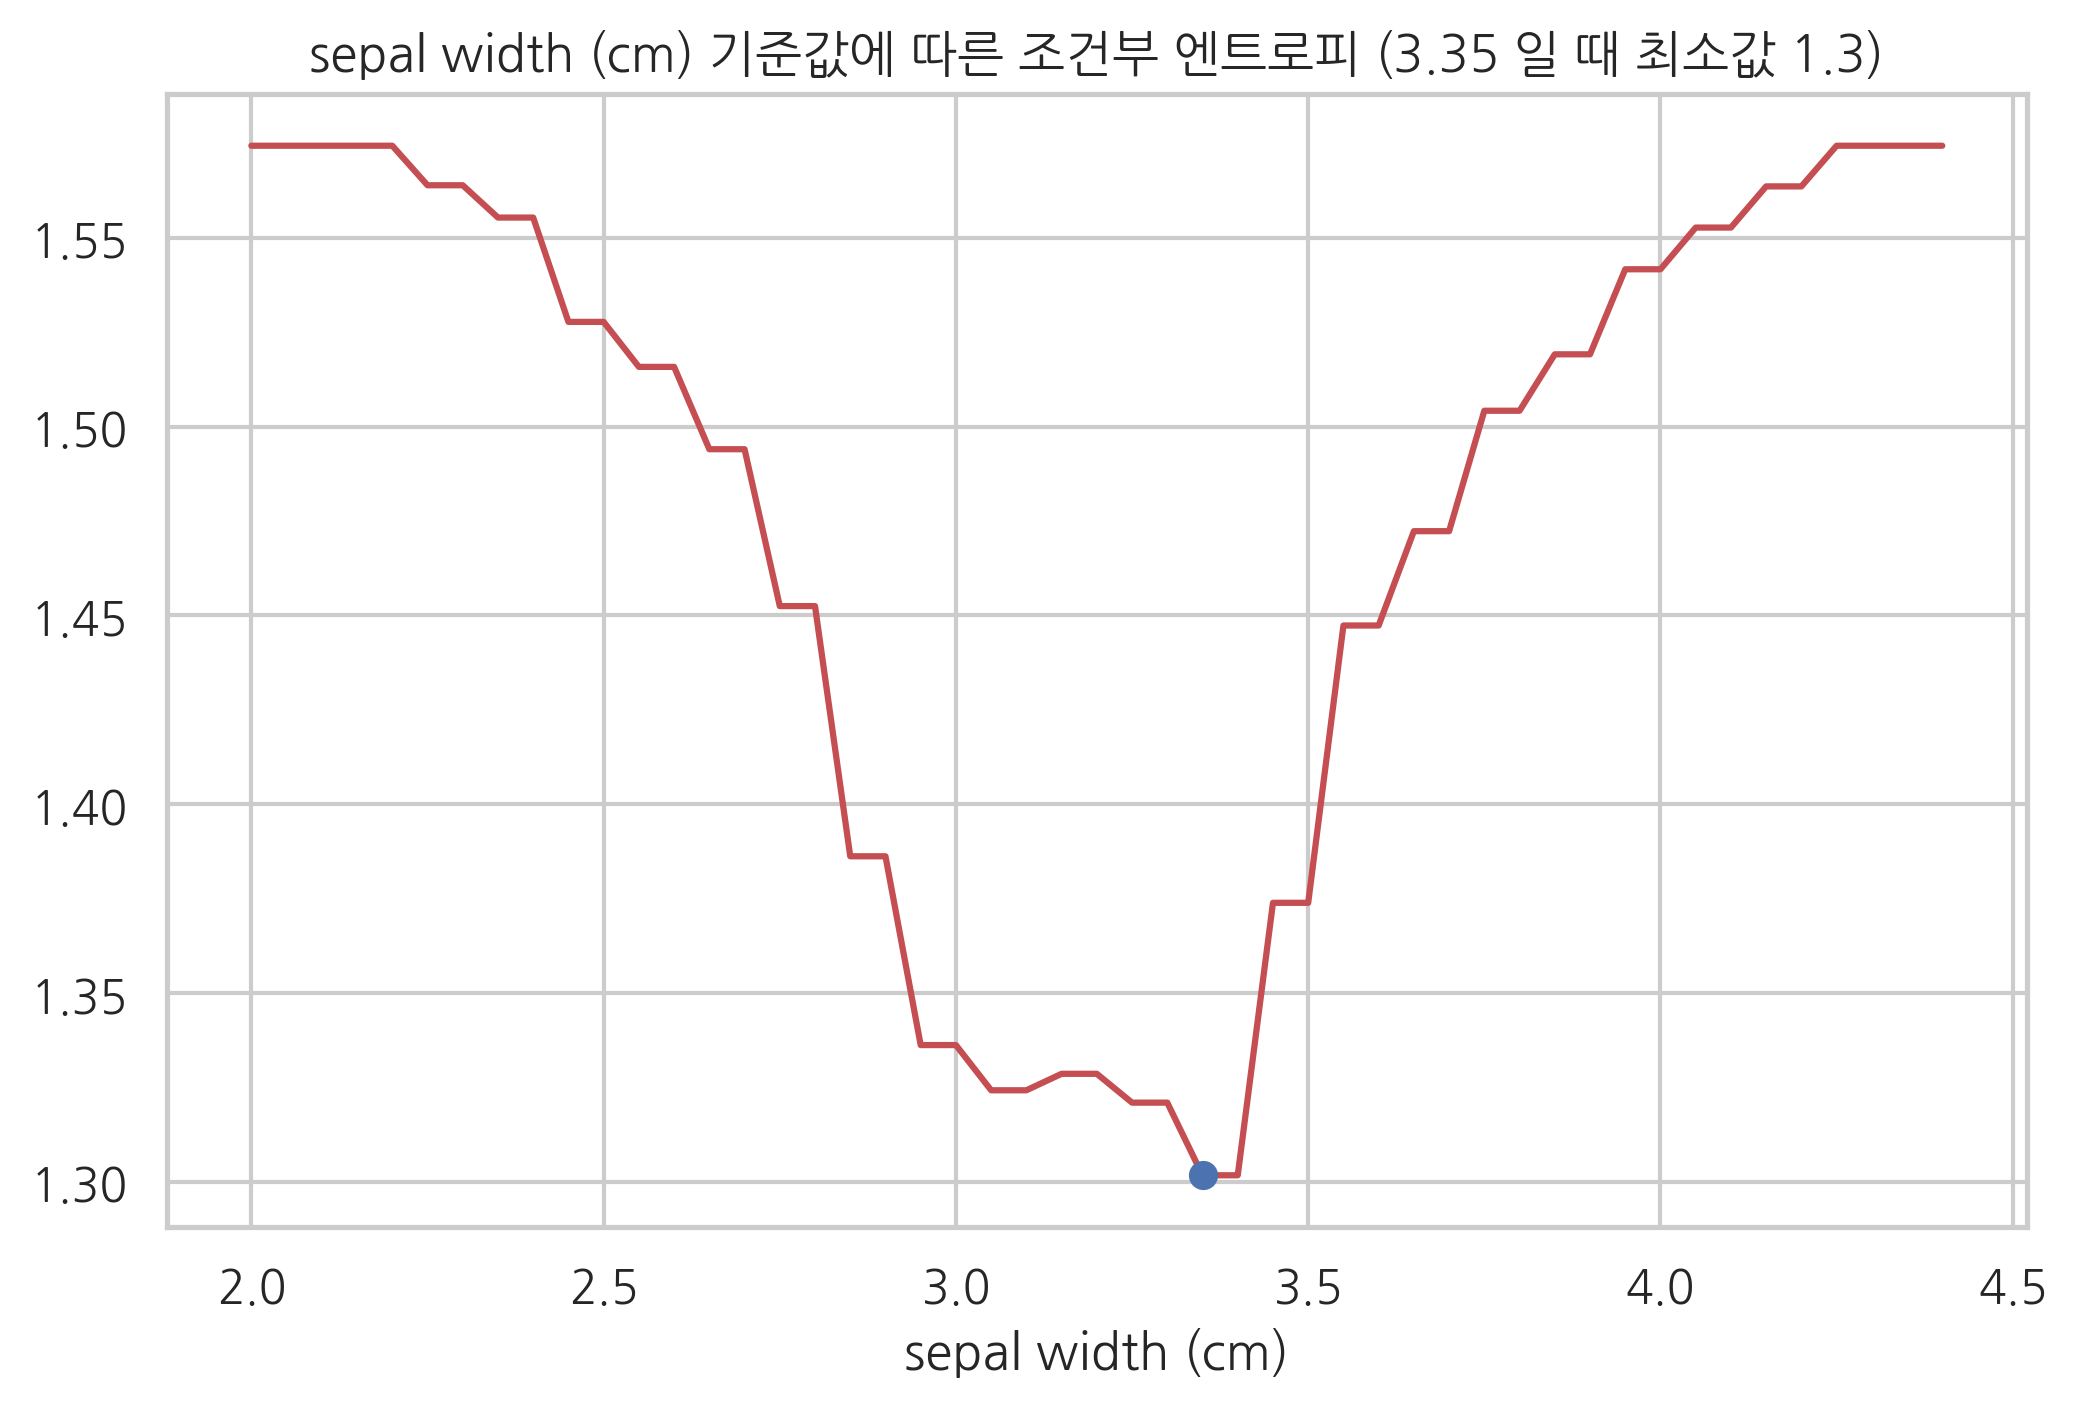

In [53]:
plot_min_cond_entropy('sepal width (cm)')

3.35

4.

꽃받침 길이